In [3]:
!pip install pandas

In [10]:
# lấy dữ liệu mới cho các mã cổ phiếu đã chọn
selected_symbols = ['ACB', 'FPT', 'GAS', 'HPG', 'VCB', 'SSI']


In [1]:
!pip install vnstock

In [2]:
# Import VNStockDataProvider, pandas và os
import sys
import pandas as pd
import os
sys.path.append(r'D:\nckh\SARSA_FinancialRL\data\data_provider\library_extracted\vnstock')
from VNStockDataProvider import VNStockDataProvider

In [11]:
# Khởi tạo VNStockDataProvider
provider = VNStockDataProvider(source='VCI')

# Định nghĩa khoảng thời gian
start_date = '2013-01-01'
end_date = '2024-12-31'
interval = '1D'

In [12]:
# Lấy dữ liệu cho từng mã cổ phiếu và lưu vào biến riêng
for symbol in selected_symbols:
    print(f"Đang lấy dữ liệu cho {symbol}...")
    df = provider.get_ohlcv_data(symbol, start_date, end_date, interval, verbose=False)
    # Lưu vào biến động, ví dụ df_ACB, df_FPT, v.v.
    globals()[f'df_{symbol}'] = df
    print(f"Đã lưu dữ liệu cho {symbol} vào df_{symbol}, shape: {df.shape}")

print("Hoàn tất lấy dữ liệu cho tất cả mã!")

Đang lấy dữ liệu cho ACB...
Đã lưu dữ liệu cho ACB vào df_ACB, shape: (3133, 7)
Đang lấy dữ liệu cho FPT...
Đã lưu dữ liệu cho FPT vào df_FPT, shape: (3133, 7)
Đang lấy dữ liệu cho GAS...
Đã lưu dữ liệu cho GAS vào df_GAS, shape: (3133, 7)
Đang lấy dữ liệu cho HPG...
Đã lưu dữ liệu cho HPG vào df_HPG, shape: (3133, 7)
Đang lấy dữ liệu cho VCB...
Đã lưu dữ liệu cho VCB vào df_VCB, shape: (3133, 7)
Đang lấy dữ liệu cho SSI...
Đã lưu dữ liệu cho SSI vào df_SSI, shape: (3133, 7)
Hoàn tất lấy dữ liệu cho tất cả mã!


In [13]:
# Chỉnh sửa các DataFrame: đổi 'date' thành 'time', định dạng dd/mm/yyyy, bỏ 'symbol'
for symbol in selected_symbols:
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    
    # Đổi tên cột 'date' thành 'time'
    df = df.rename(columns={'date': 'time'})
    
    # Chuyển đổi định dạng ngày từ yyyy/mm/dd thành dd/mm/yyyy
    df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
    
    # Bỏ cột 'symbol'
    if 'symbol' in df.columns:
        df = df.drop(columns=['symbol'])
    
    # Cập nhật lại biến
    globals()[df_name] = df
    print(f"Đã chỉnh sửa {df_name}: shape {df.shape}, cột {df.columns.tolist()}")

print("Hoàn tất chỉnh sửa tất cả DataFrame!")

Đã chỉnh sửa df_ACB: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_FPT: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_GAS: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_HPG: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_VCB: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Đã chỉnh sửa df_SSI: shape (3133, 6), cột ['time', 'open', 'high', 'low', 'close', 'volume']
Hoàn tất chỉnh sửa tất cả DataFrame!


In [14]:
# Lưu mỗi DataFrame thành file CSV
import os

output_dir = r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research'

# Tạo thư mục nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

for symbol in selected_symbols:
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    file_path = os.path.join(output_dir, f'{symbol}_data.csv')
    df.to_csv(file_path, index=False)
    print(f"Đã lưu {df_name} vào {file_path}")

print("Hoàn tất lưu tất cả file CSV!")

Đã lưu df_ACB vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\ACB_data.csv
Đã lưu df_FPT vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\FPT_data.csv
Đã lưu df_GAS vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\GAS_data.csv
Đã lưu df_HPG vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\HPG_data.csv
Đã lưu df_VCB vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\VCB_data.csv
Đã lưu df_SSI vào D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\SSI_data.csv
Hoàn tất lưu tất cả file CSV!


Dữ liệu của VNM sau chỉnh sửa:


NameError: name 'df_VNM' is not defined

In [15]:
# Tạo các biến DataFrame mới để lưu trữ các file CSV đã lưu
import pandas as pd

df_ACB = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\ACB_data.csv')
df_FPT = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\FPT_data.csv')
df_GAS = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\GAS_data.csv')
df_HPG = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\HPG_data.csv')
df_VCB = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\VCB_data.csv')
df_SSI = pd.read_csv(r'D:\nckh\SARSA_FinancialRL\data\data_storer\data_research\SSI_data.csv')

print("Đã tạo các biến DataFrame:")
print(f"df_ACB: {df_ACB.shape}")
print(f"df_FPT: {df_FPT.shape}")
print(f"df_GAS: {df_GAS.shape}")
print(f"df_HPG: {df_HPG.shape}")
print(f"df_VCB: {df_VCB.shape}")
print(f"df_SSI: {df_SSI.shape}")

Đã tạo các biến DataFrame:
df_ACB: (3133, 6)
df_FPT: (3133, 6)
df_GAS: (3133, 6)
df_HPG: (3133, 6)
df_VCB: (3133, 6)
df_SSI: (3133, 6)


In [16]:
df_ACB

,time,open,high,low,close,volume
0,13/06/2012,3.58,3.61,3.58,3.61,289700
1,14/06/2012,3.60,3.61,3.58,3.58,294900
2,15/06/2012,3.58,3.60,3.58,3.58,180600
3,18/06/2012,3.58,3.63,3.58,3.61,129000
4,19/06/2012,3.61,3.63,3.60,3.61,402200
...,...,...,...,...,...,...
3128,25/12/2024,20.89,21.39,20.85,21.26,9518178
3129,26/12/2024,21.26,21.35,21.22,21.35,5583577
3130,27/12/2024,21.39,21.47,21.31,21.35,7694895
3131,30/12/2024,21.18,21.43,21.18,21.22,5004572


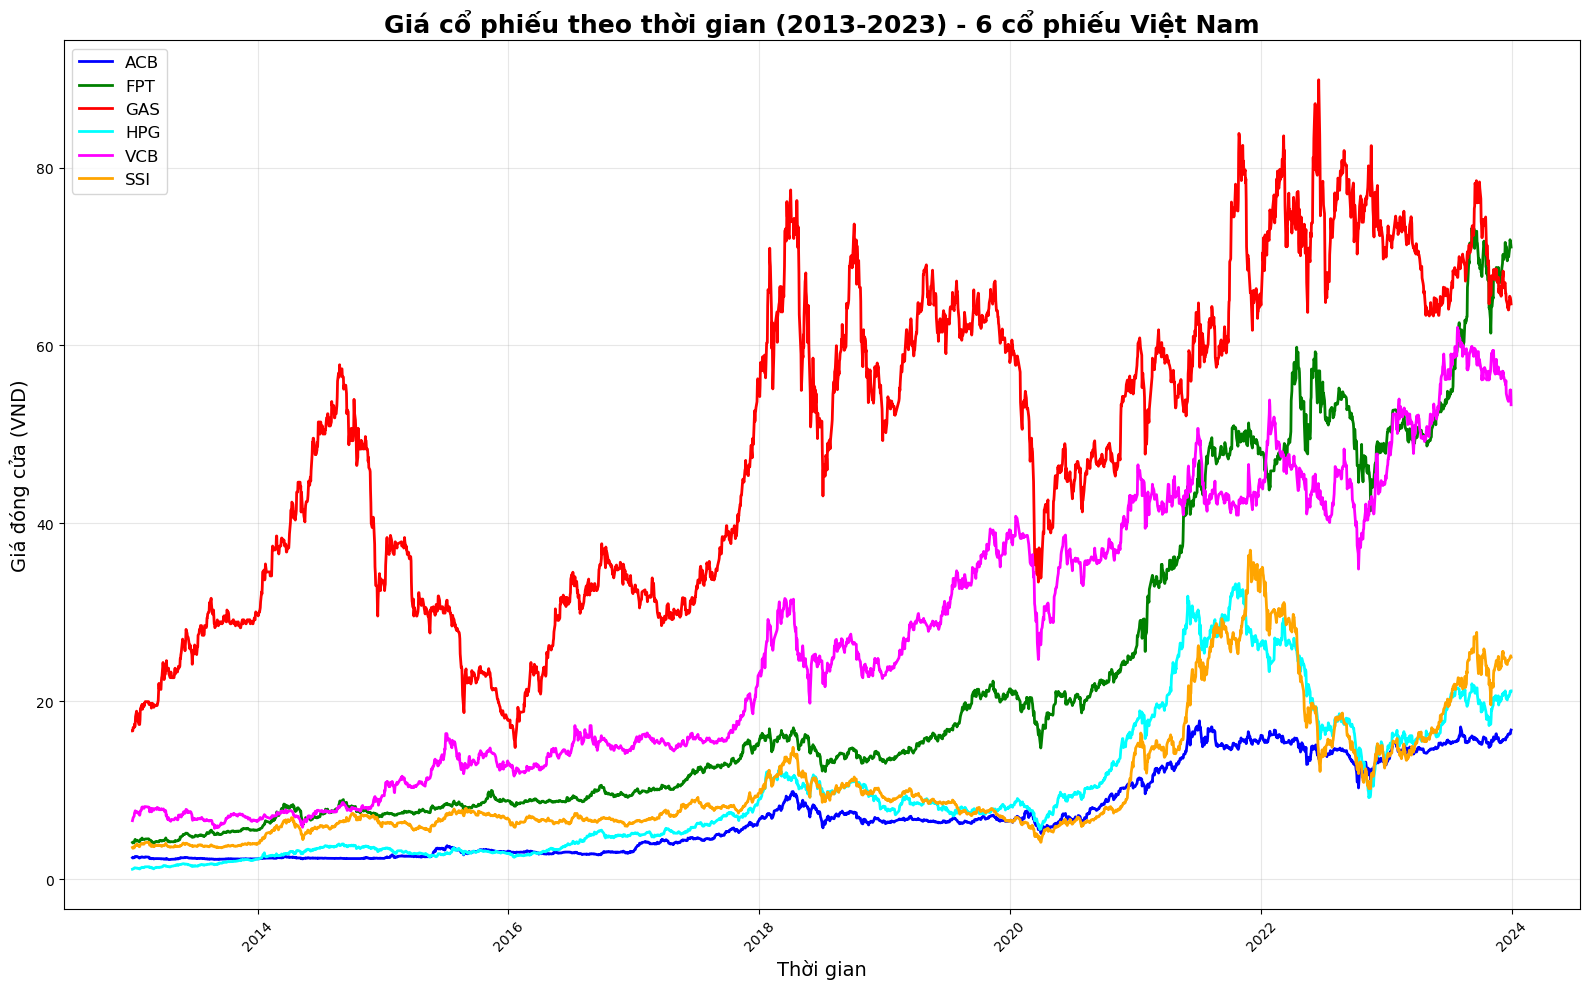

In [ ]:
# Vẽ đồ thị giá cổ phiếu theo thời gian cho 6 cổ phiếu
import matplotlib.pyplot as plt
import pandas as pd

# Danh sách cổ phiếu và màu sắc
symbols = ['ACB', 'FPT', 'GAS', 'HPG', 'VCB', 'SSI']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange']

# Tạo figure
plt.figure(figsize=(16, 10))

for i, symbol in enumerate(symbols):
    df_name = f'df_{symbol}'
    df = globals()[df_name]
    
    # Chuyển 'time' thành datetime để vẽ
    df['time_dt'] = pd.to_datetime(df['time'], format='%d/%m/%Y')
    
    # Lọc dữ liệu từ 1/1/2013 đến 31/12/2023
    df_filtered = df[(df['time_dt'] >= '01-01-2013') & (df['time_dt'] <= '31-12-2023')]
    
    # Vẽ đường giá đóng cửa
    plt.plot(df_filtered['time_dt'], df_filtered['close'], color=colors[i], label=symbol, linewidth=2)

# Thiết lập đồ thị
plt.title('Giá cổ phiếu theo thời gian (2013-2023) - 6 cổ phiếu Việt Nam', fontsize=18, fontweight='bold')
plt.xlabel('Thời gian', fontsize=14)
plt.ylabel('Giá đóng cửa (ngàn VND)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị đồ thị
plt.show()